In [2]:
import Plant
import Drone
from configurations import defaultConfig 
import numpy as np
from plottingFunctions import state_plots

# Steady state Response
Expected outcome is a flat plot.  This tests both the calculate coherent command and the dynamics of the plant

/home/matthew/Documents/Flappy-Junco/plottingFunctions.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


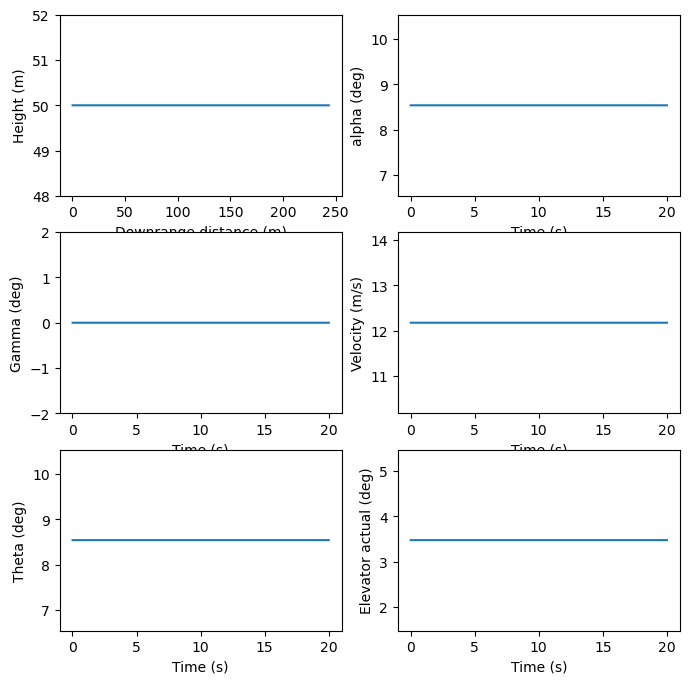

In [3]:
import importlib
importlib.reload(Plant)

config = defaultConfig()
plant = Plant.Plant(config)
drone = Drone.Drone(config, config)

thrustCommand = 4.4
fpaCommand = 0/180*np.pi
dynRef = drone.coherentCommand(thrustCommand,fpaCommand)
elivatorRef = drone.elevatorFromAlpha(dynRef[1]-dynRef[3])
action = (thrustCommand, elivatorRef)
stateRef = np.hstack(([0,50], dynRef))

plant.reset(stateRef)

iterations = 2000
traj = np.zeros((7,iterations))
thrustCommand = np.zeros(iterations)+action[0]
elvActual = np.zeros(iterations) + action[1]

for iter in range(0, iterations):
    observation, reward, terminated = plant.step(action)
    state = plant.state

    traj[:,iter] = np.hstack((state,plant.time))
    if terminated:
        break
        
state_plots(traj, elvActual)


# Step Response
Expected outcome is a oscolations.  This tests demos the uncontrolled response of the plant.

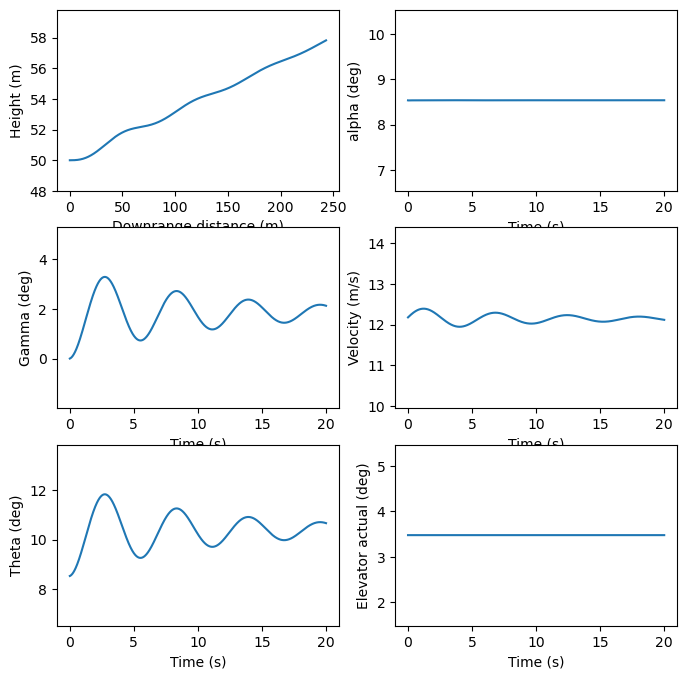

In [49]:
import importlib
importlib.reload(Plant)

config = defaultConfig()
plant = Plant.Plant(config)
drone = Drone.Drone(config)

thrustCommand = 4.4
fpaCommand = 0/180*np.pi
dynRef = drone.coherentCommand(thrustCommand,fpaCommand)
elivatorRef = drone.elevatorFromAlpha(dynRef[1]-dynRef[3])
stateRef = np.hstack(([0,50], dynRef))

plant.reset(stateRef)

# NEW COMMAND
action = (thrustCommand+1, elivatorRef)

iterations = 2000
traj = np.zeros((7,iterations))
thrustCommand = np.zeros(iterations)+action[0]
elvActual = np.zeros(iterations) + action[1]

for iter in range(0, iterations):
    observation, reward, terminated = plant.step(action)
    state = plant.state

    traj[:,iter] = np.hstack((state,plant.time))
    if terminated:
        break
        
state_plots(traj, elvActual)
